In [6]:
%matplotlib inline

import datadive.diveindata.diveindata as dv

In [2]:
terror = dv.DataInfo('./globalterrorismdb_0616dist.csv', params={'encoding': 'latin1'})

/home/walrus/.virtualenvs/py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# Columns metadata and basic stats

In [35]:
terror.columns

{'INT_ANY': {'idxmin': -9,
  'max': 1,
  'mean': -4.2211236700431201,
  'min': -9,
  'std': 4.6861425686833682,
  'sum': -661754,
  'type': 'INT',
  'uniques': 3},
 'INT_IDEO': {'idxmin': -9,
  'max': 1,
  'mean': -4.7891141275227715,
  'min': -9,
  'std': 4.5897788910995079,
  'sum': -750799,
  'type': 'INT',
  'uniques': 3},
 'INT_LOG': {'idxmin': -9,
  'max': 1,
  'mean': -4.834645217258184,
  'min': -9,
  'std': 4.5288624534878359,
  'sum': -757937,
  'type': 'INT',
  'uniques': 3},
 'INT_MISC': {'idxmin': -9,
  'max': 1,
  'mean': 0.093894317862883672,
  'min': -9,
  'std': 0.60244188893120521,
  'sum': 14720,
  'type': 'INT',
  'uniques': 3},
 'addnotes': {'type': 'CATEGORY', 'uniques': 12762},
 'alternative': {'equivalents': ['alternative_txt'],
  'has_equivalent': True,
  'idxmin': 1.0,
  'max': 5.0,
  'mean': 1.2989354678989933,
  'min': 1.0,
  'std': 0.68227016215906133,
  'sum': 31481.0,
  'type': 'FLOAT',
  'uniques': 6},
 'alternative_txt': {'equivalents': ['alternative'],

In [36]:
terror.columns['nkill']

{'idxmin': 0.0,
 'max': 1500.0,
 'mean': 2.3592374870502684,
 'min': 0.0,
 'std': 11.42127034765741,
 'sum': 348758.99999818002,
 'type': 'FLOAT',
 'uniques': 339}

In [37]:
terror.columns['country_txt']

{'equivalents': ['country'],
 'has_equivalent': True,
 'type': 'CATEGORY',
 'uniques': 206}

# Group by region

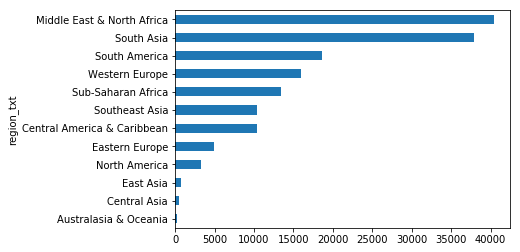

In [7]:
terror.bar_groups(['region_txt']).plot.barh()

# Filter a list of regions

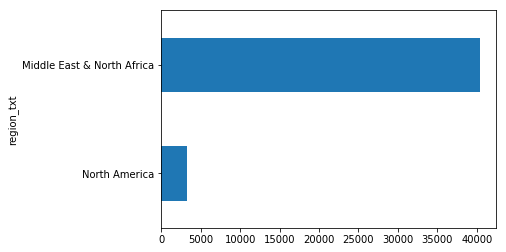

In [9]:
terror.bar_groups([('region_txt', ['North America', 'Middle East & North Africa'])]).plot.barh()

# Select multiple columns

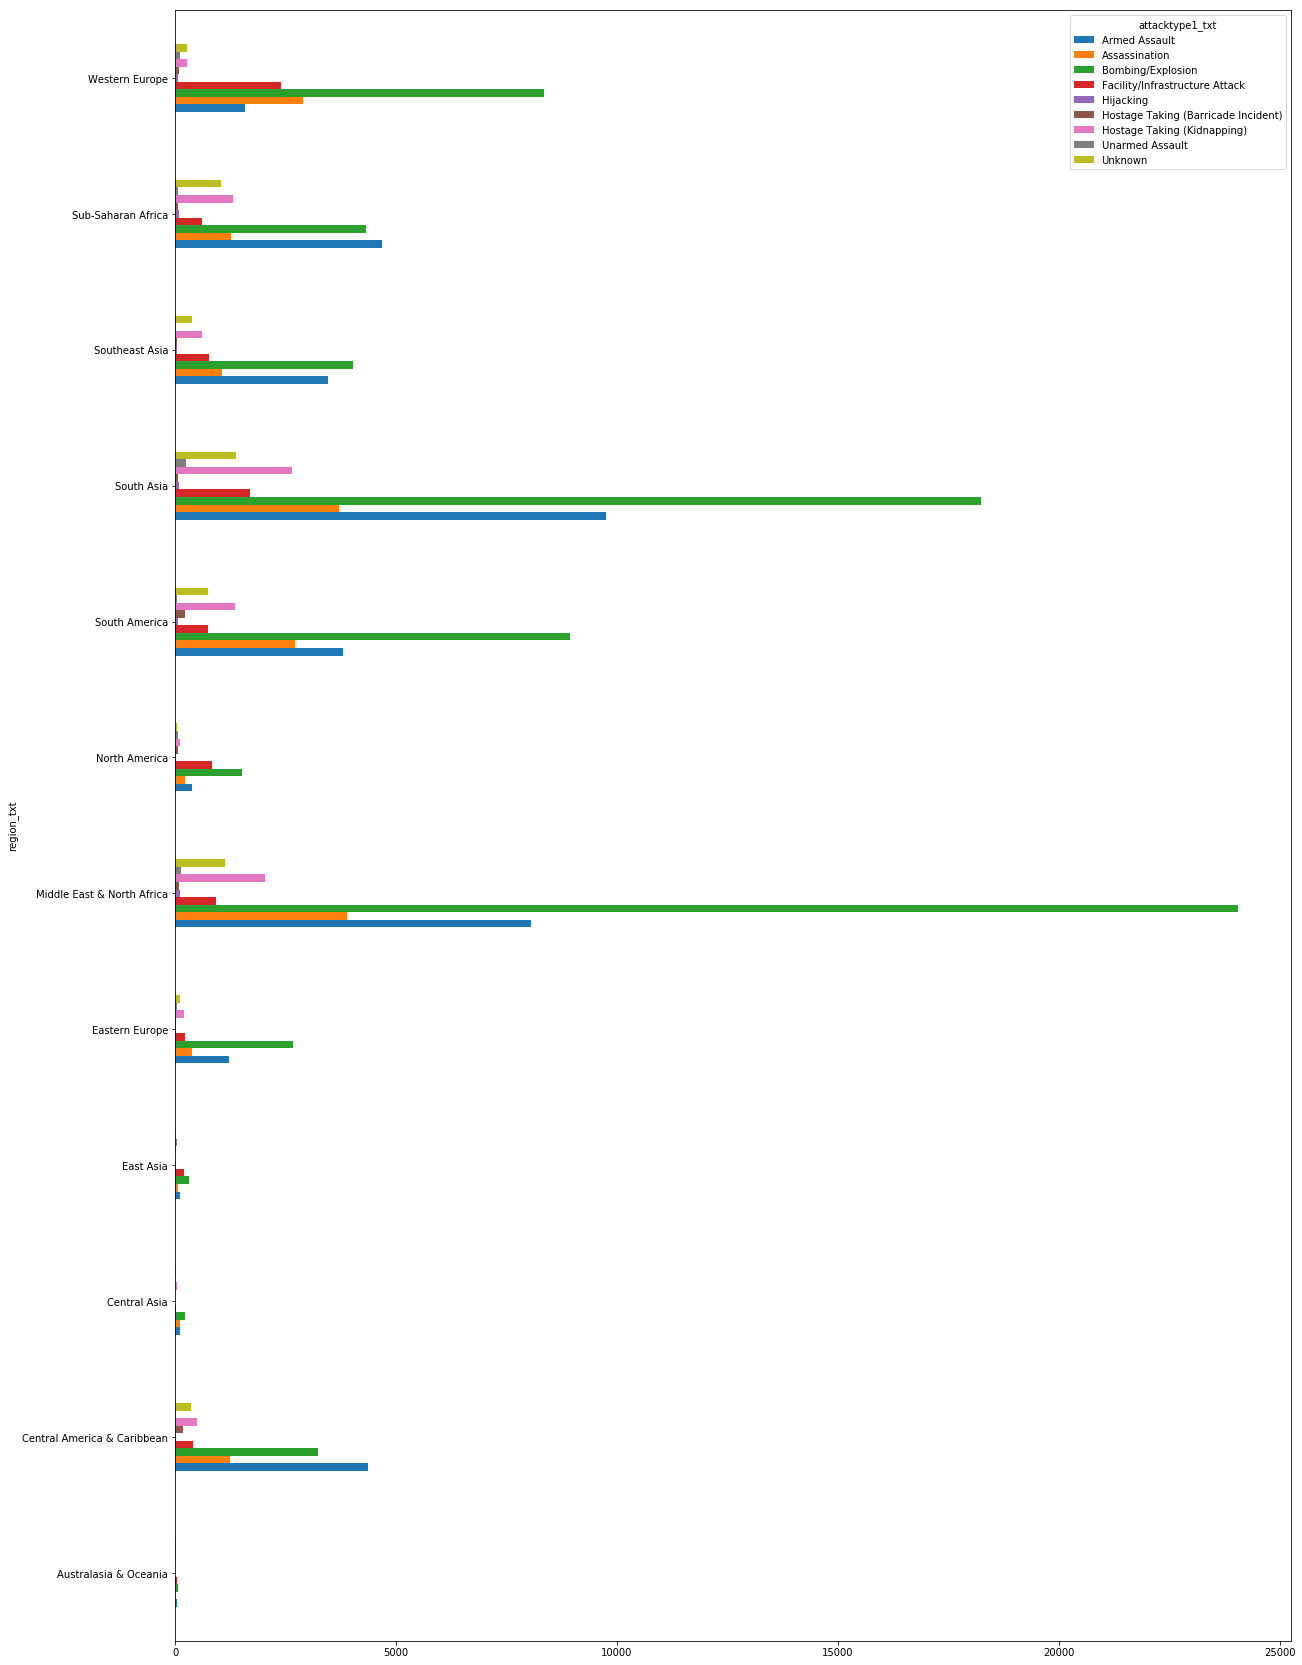

In [17]:
# If 'level = 1' we use column 1 ('arracktype1_txt') for the groups

terror.bar_groups(['region_txt', 'attacktype1_txt']).unstack(level=1).plot.barh(figsize=(20,30))

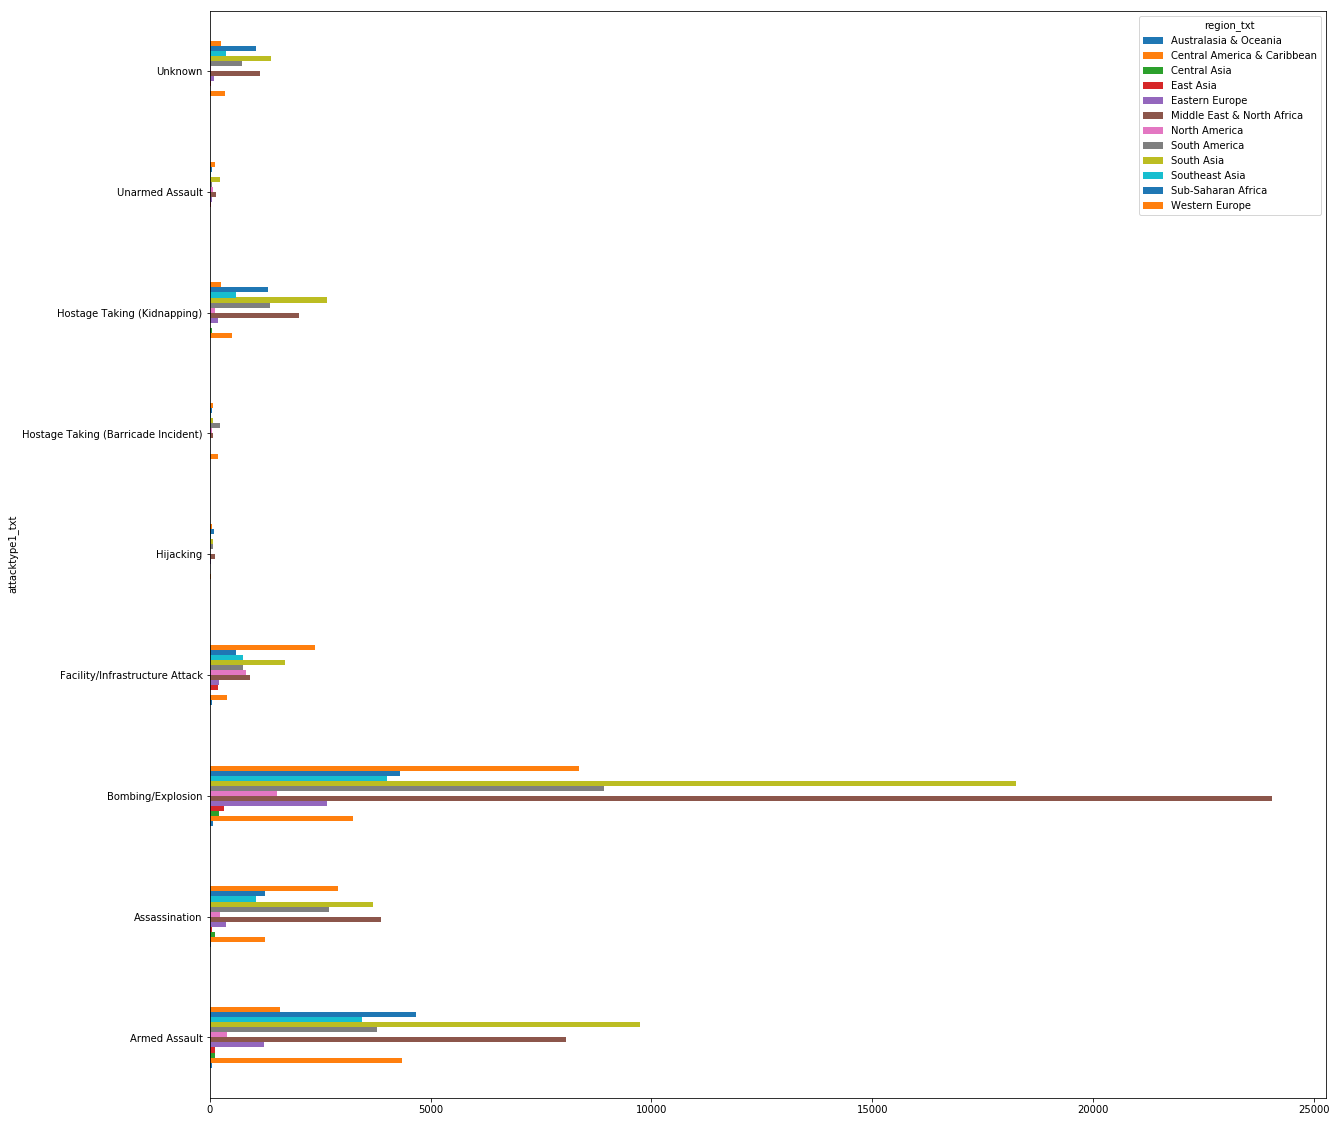

In [20]:
# If 'level = 0' we use column 0 ('region_txt') for the groups

terror.bar_groups(['region_txt', 'attacktype1_txt']).unstack(level=0).plot.barh(figsize=(20,20))

# Multiple columns and filtering

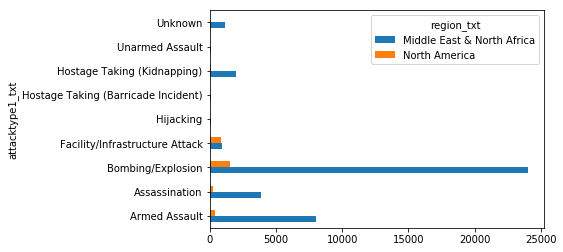

In [18]:
terror.bar_groups([('region_txt', ['North America', 'Middle East & North Africa']), 'attacktype1_txt']).unstack(level=0).plot.barh()

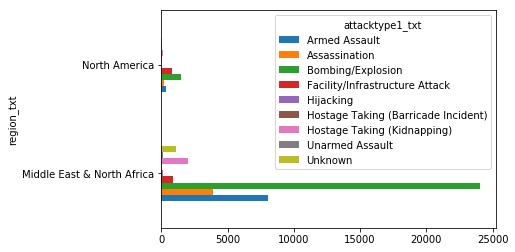

In [12]:
terror.bar_groups([('region_txt', ['North America', 'Middle East & North Africa']), 'attacktype1_txt']).unstack(level=1).plot.barh()

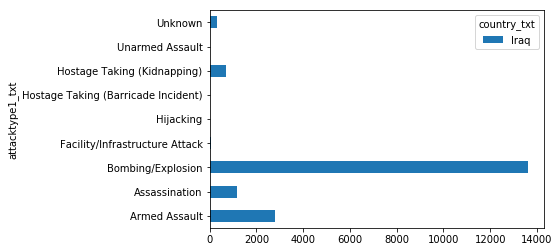

In [26]:
terror.bar_groups([('country_txt', 'Iraq'), 'attacktype1_txt']).unstack(level=0).plot.barh()

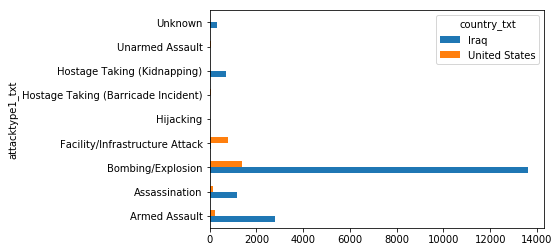

In [27]:
terror.bar_groups([('country_txt', ['Iraq', 'United States']), 'attacktype1_txt']).unstack(level=0).plot.barh()

# Select another column to calculate

By default the bar graph is going to display the count of entries in a given category. If you pass a column name, it is going to use it for the weight of the bar.

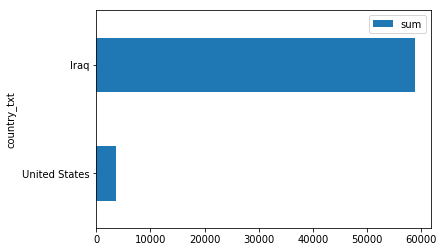

In [34]:
terror.bar_groups([('country_txt', ['Iraq', 'United States'])], 'nkill').plot.barh()

The default is to sum the values in this column, if you want other types of aggregation, you can pass a argument 'aggs' with possible values as ['sum', 'count', 'mean', 'std']:

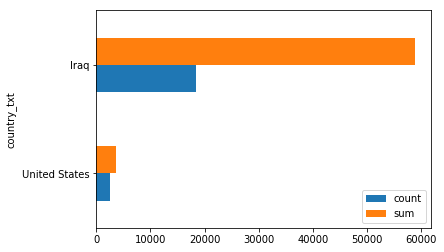

In [33]:
terror.bar_groups([('country_txt', ['Iraq', 'United States'])], 'nkill', aggs=['count', 'sum']).plot.barh()